In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from PIL import Image

from skimage.morphology import skeletonize, thin
from skimage.util import invert
from skimage import measure
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk
from skimage import feature
from skimage.filters import roberts, sobel, scharr, prewitt
import seaborn as sns
sns.reset_orig()

from skimage import restoration

from skimage import exposure
from skimage.filters import gaussian

from scipy import ndimage

from time import time

from skimage.color import rgb2gray


from skimage.filters.rank import entropy
import scipy


import cv2
import networkx as nx
from scipy import interpolate

from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity
import glob
from skimage.morphology import remove_small_objects
from skimage.morphology import disk
from skimage import io
from skimage import color

from scipy import misc
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

import threading


/Users/spencerlab/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/spencerlab/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [3]:
img = io.imread("/Users/spencerlab/Desktop/final_files/Day_5/Stack_day_5.tif")


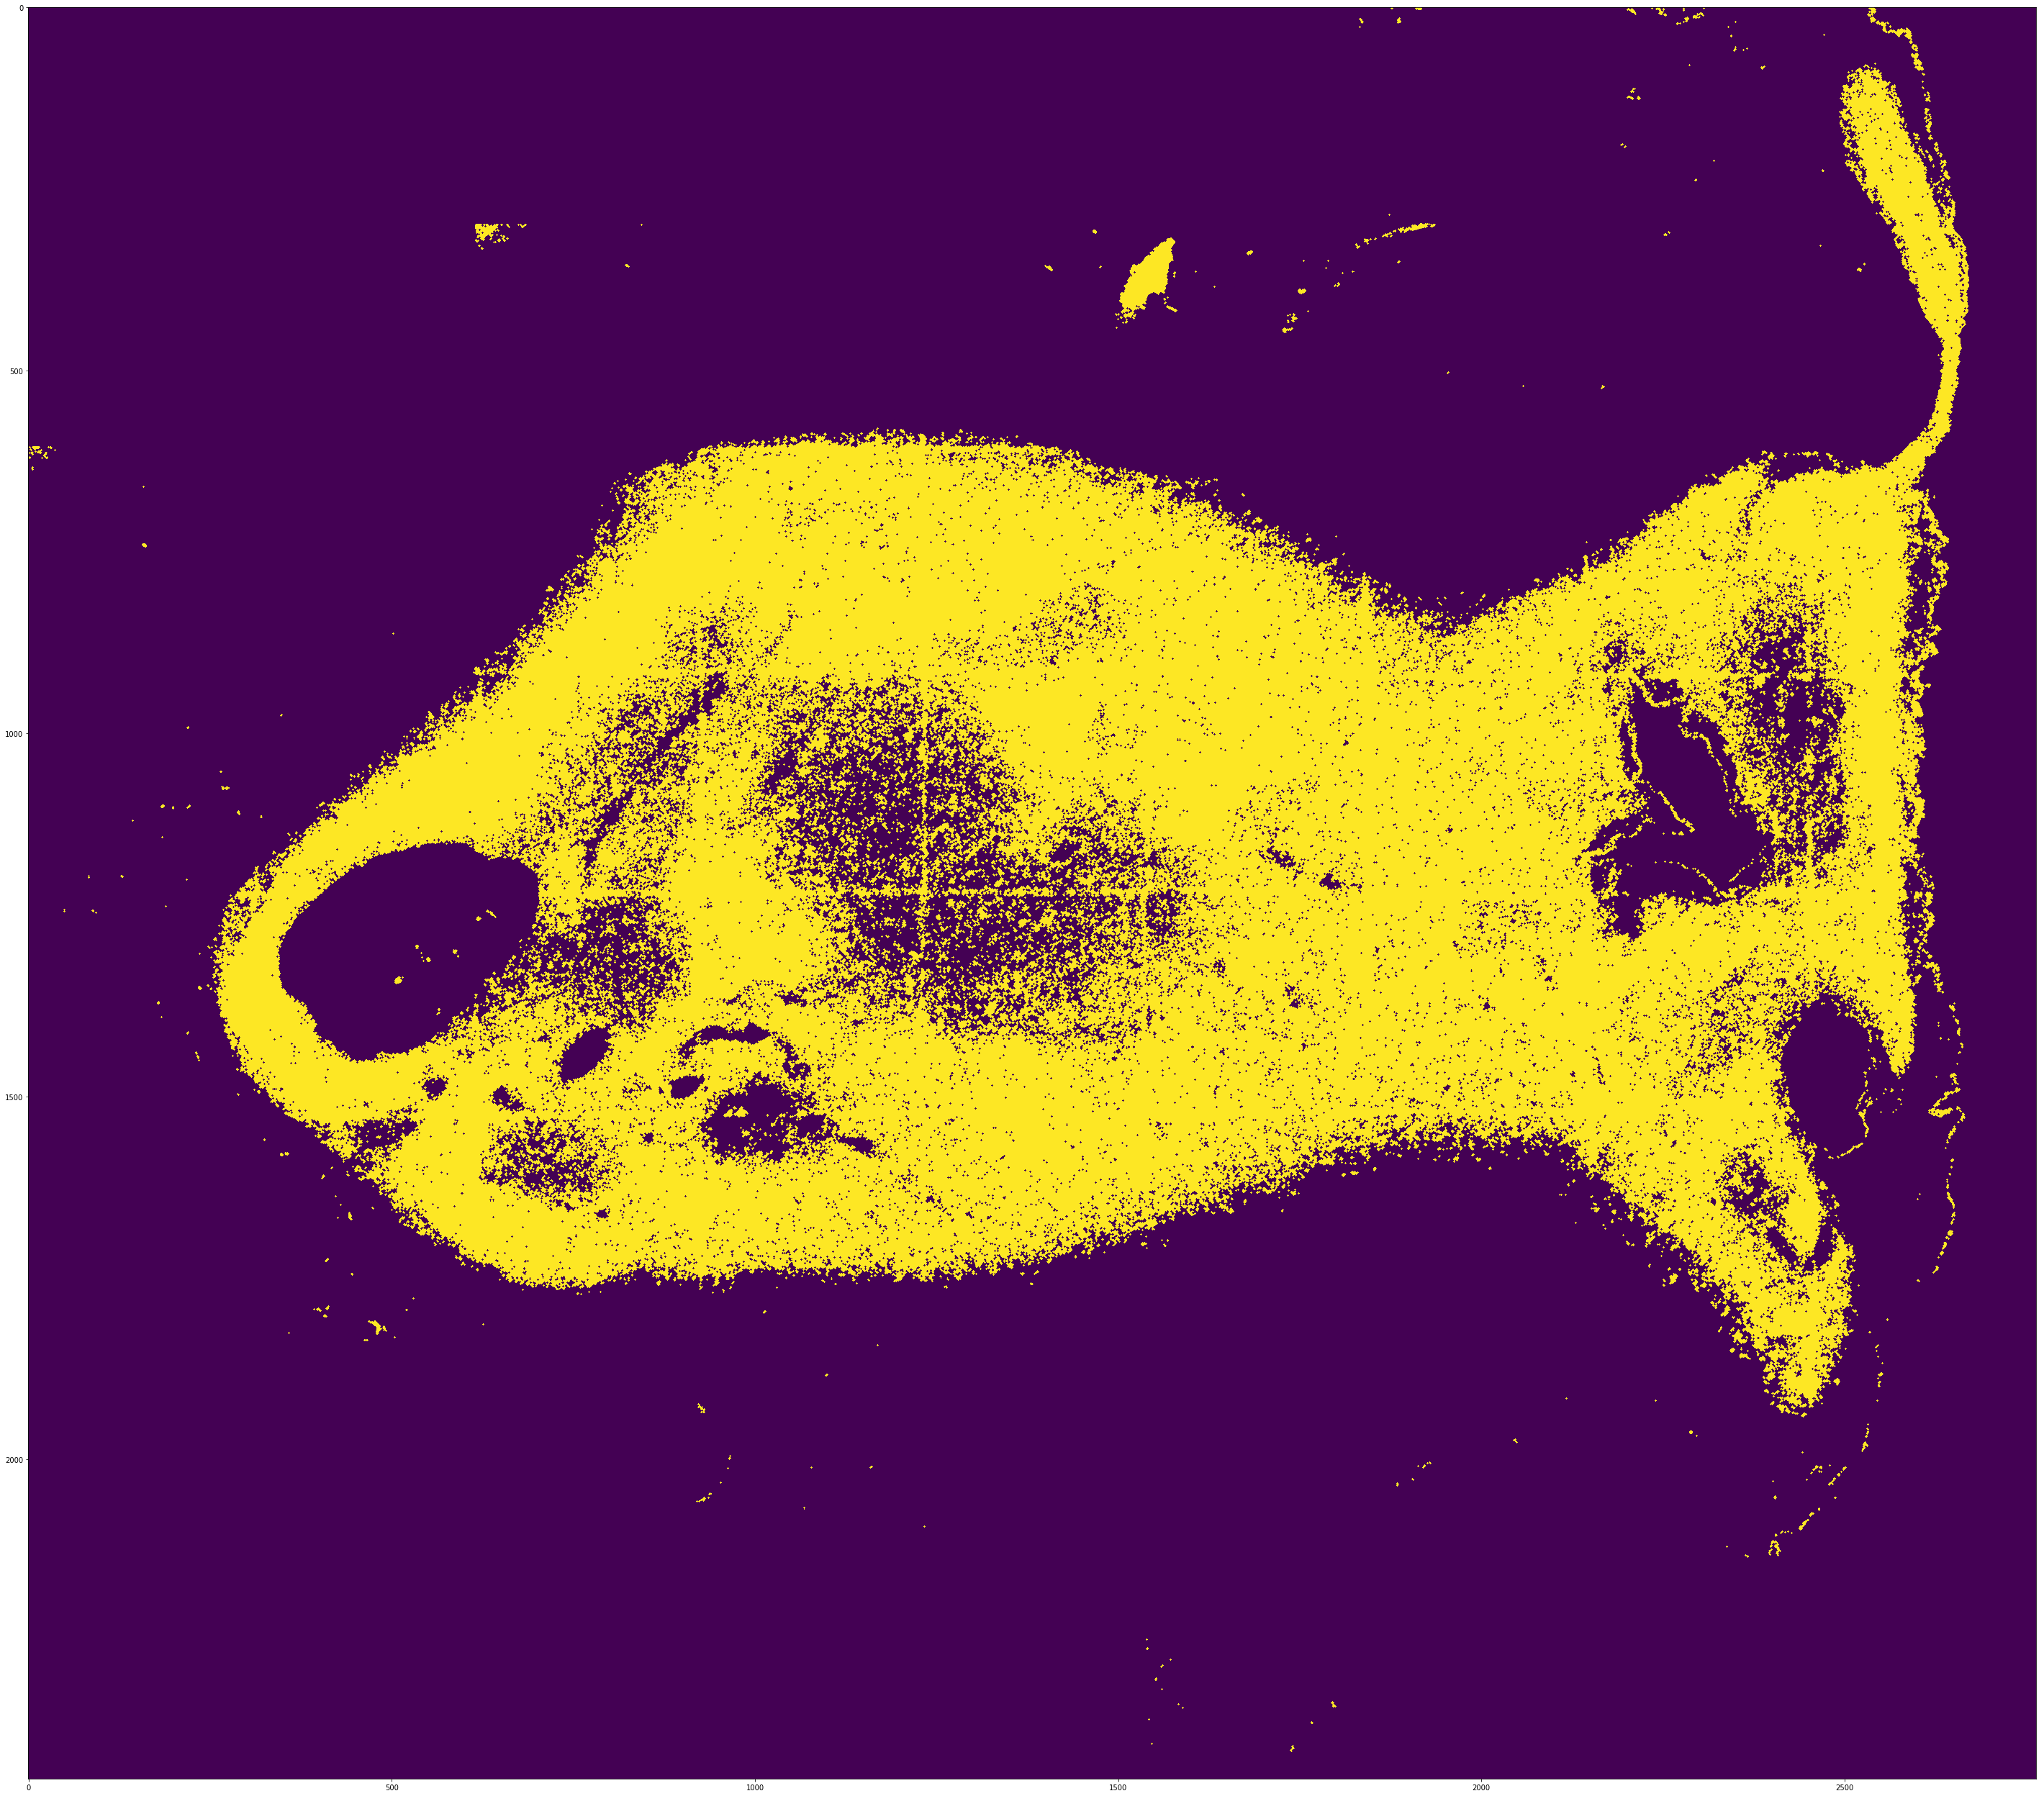

In [8]:
# i = 130

# rd = img[i,:,:,0]>20
# gr = img[i,:,:,2]>25
# bl = img[i,:,:,1]>10


# comb = np.logical_or(rd, gr)
# comb2 = np.logical_and(comb, bl)
# comb3 = ndimage.binary_erosion(comb2)
# comb5 = ndimage.binary_opening(comb3)
# comb6 = ndimage.binary_closing(comb5)


# plt.figure(figsize=(50,50))
# plt.imshow(comb6)



In [8]:
# To Export: 
for i in range(len(img)):
    rd = img[i,:,:,0]>20
    gr = img[i,:,:,2]>25
    bl = img[i,:,:,1]>10


    comb = np.logical_or(rd, gr)
    comb2 = np.logical_and(comb, bl)
    comb3 = ndimage.binary_erosion(comb2)
    comb5 = ndimage.binary_opening(comb3)
    comb6 = ndimage.binary_closing(comb5)

    
    comb6 = (comb6*255).astype('uint8') 
    comb6 = Image.fromarray(comb6)
    
    
    comb6.save('thymus_2/newtest_a/'+str(i)+".tif")

In [ ]:
# take that (^) and do fill holes on imageJ

In [6]:
try2 = io.imread("/Users/spencerlab/Downloads/thymus_2/newtest_13.tif")

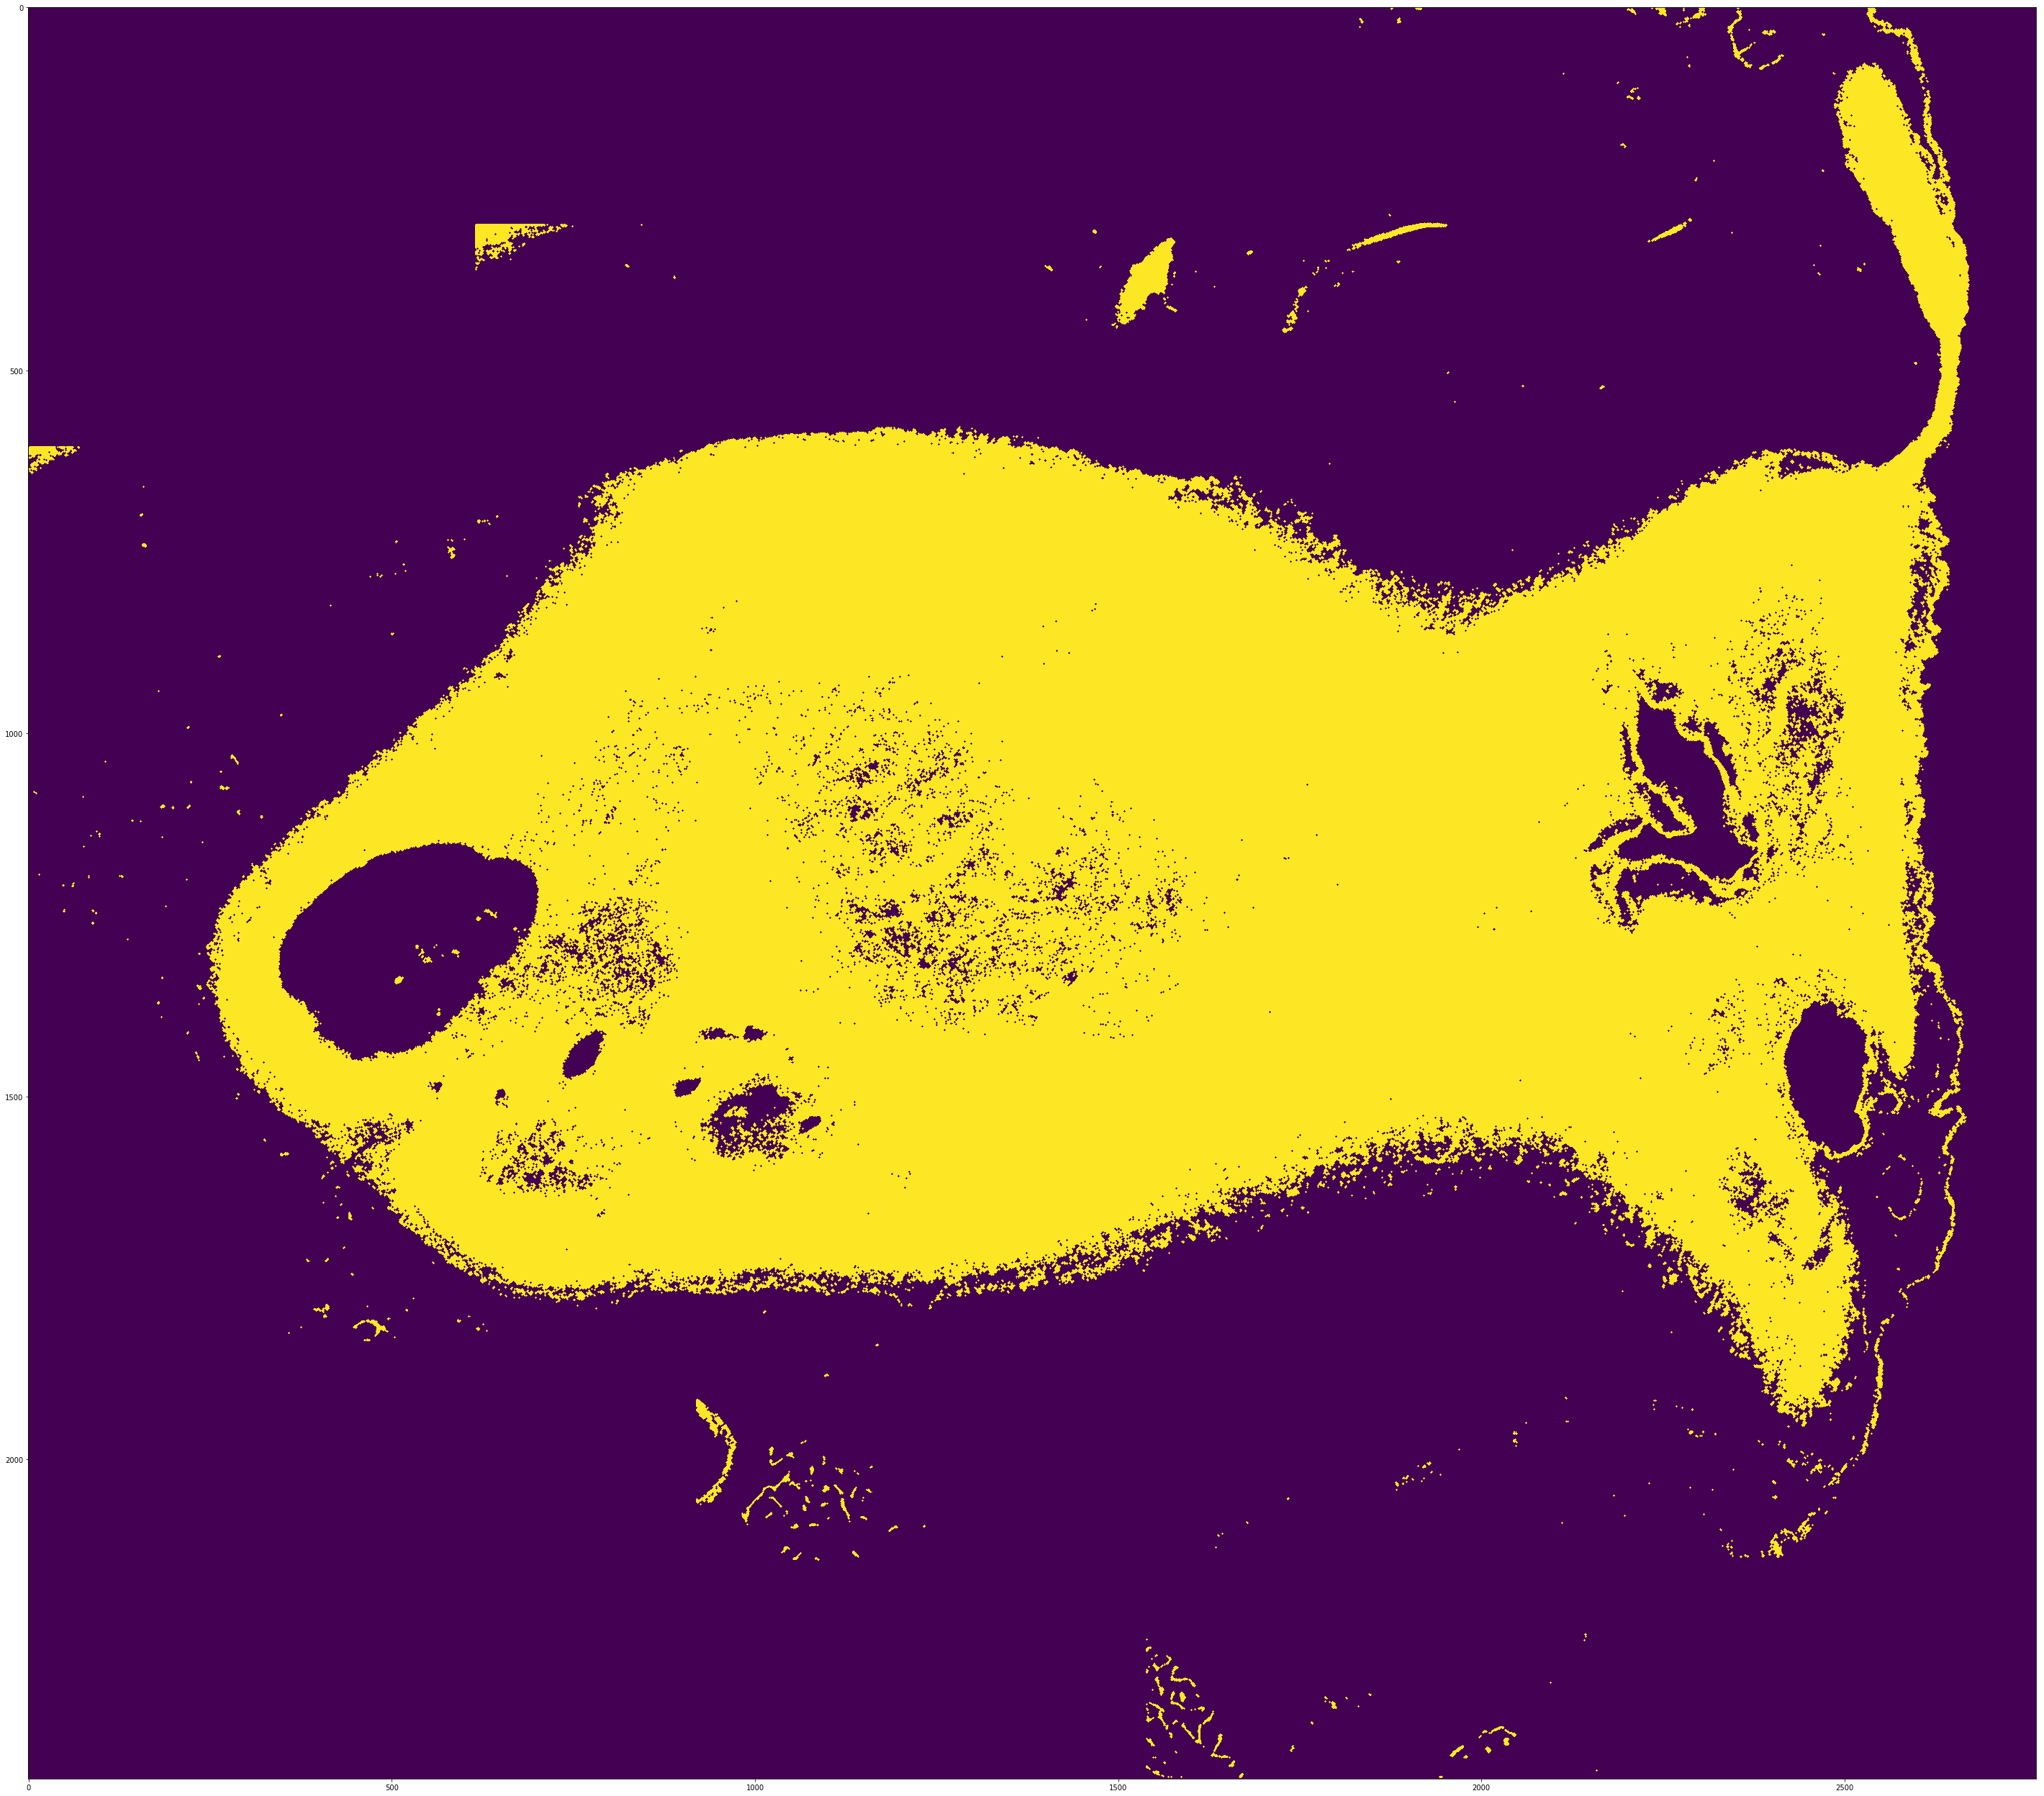

In [7]:
plt.figure(figsize=(50,50))
plt.imshow(try2[130,:,:])

In [13]:
try3 = io.imread("/Users/spencerlab/Downloads/thymus_2/newtest_b.tif")

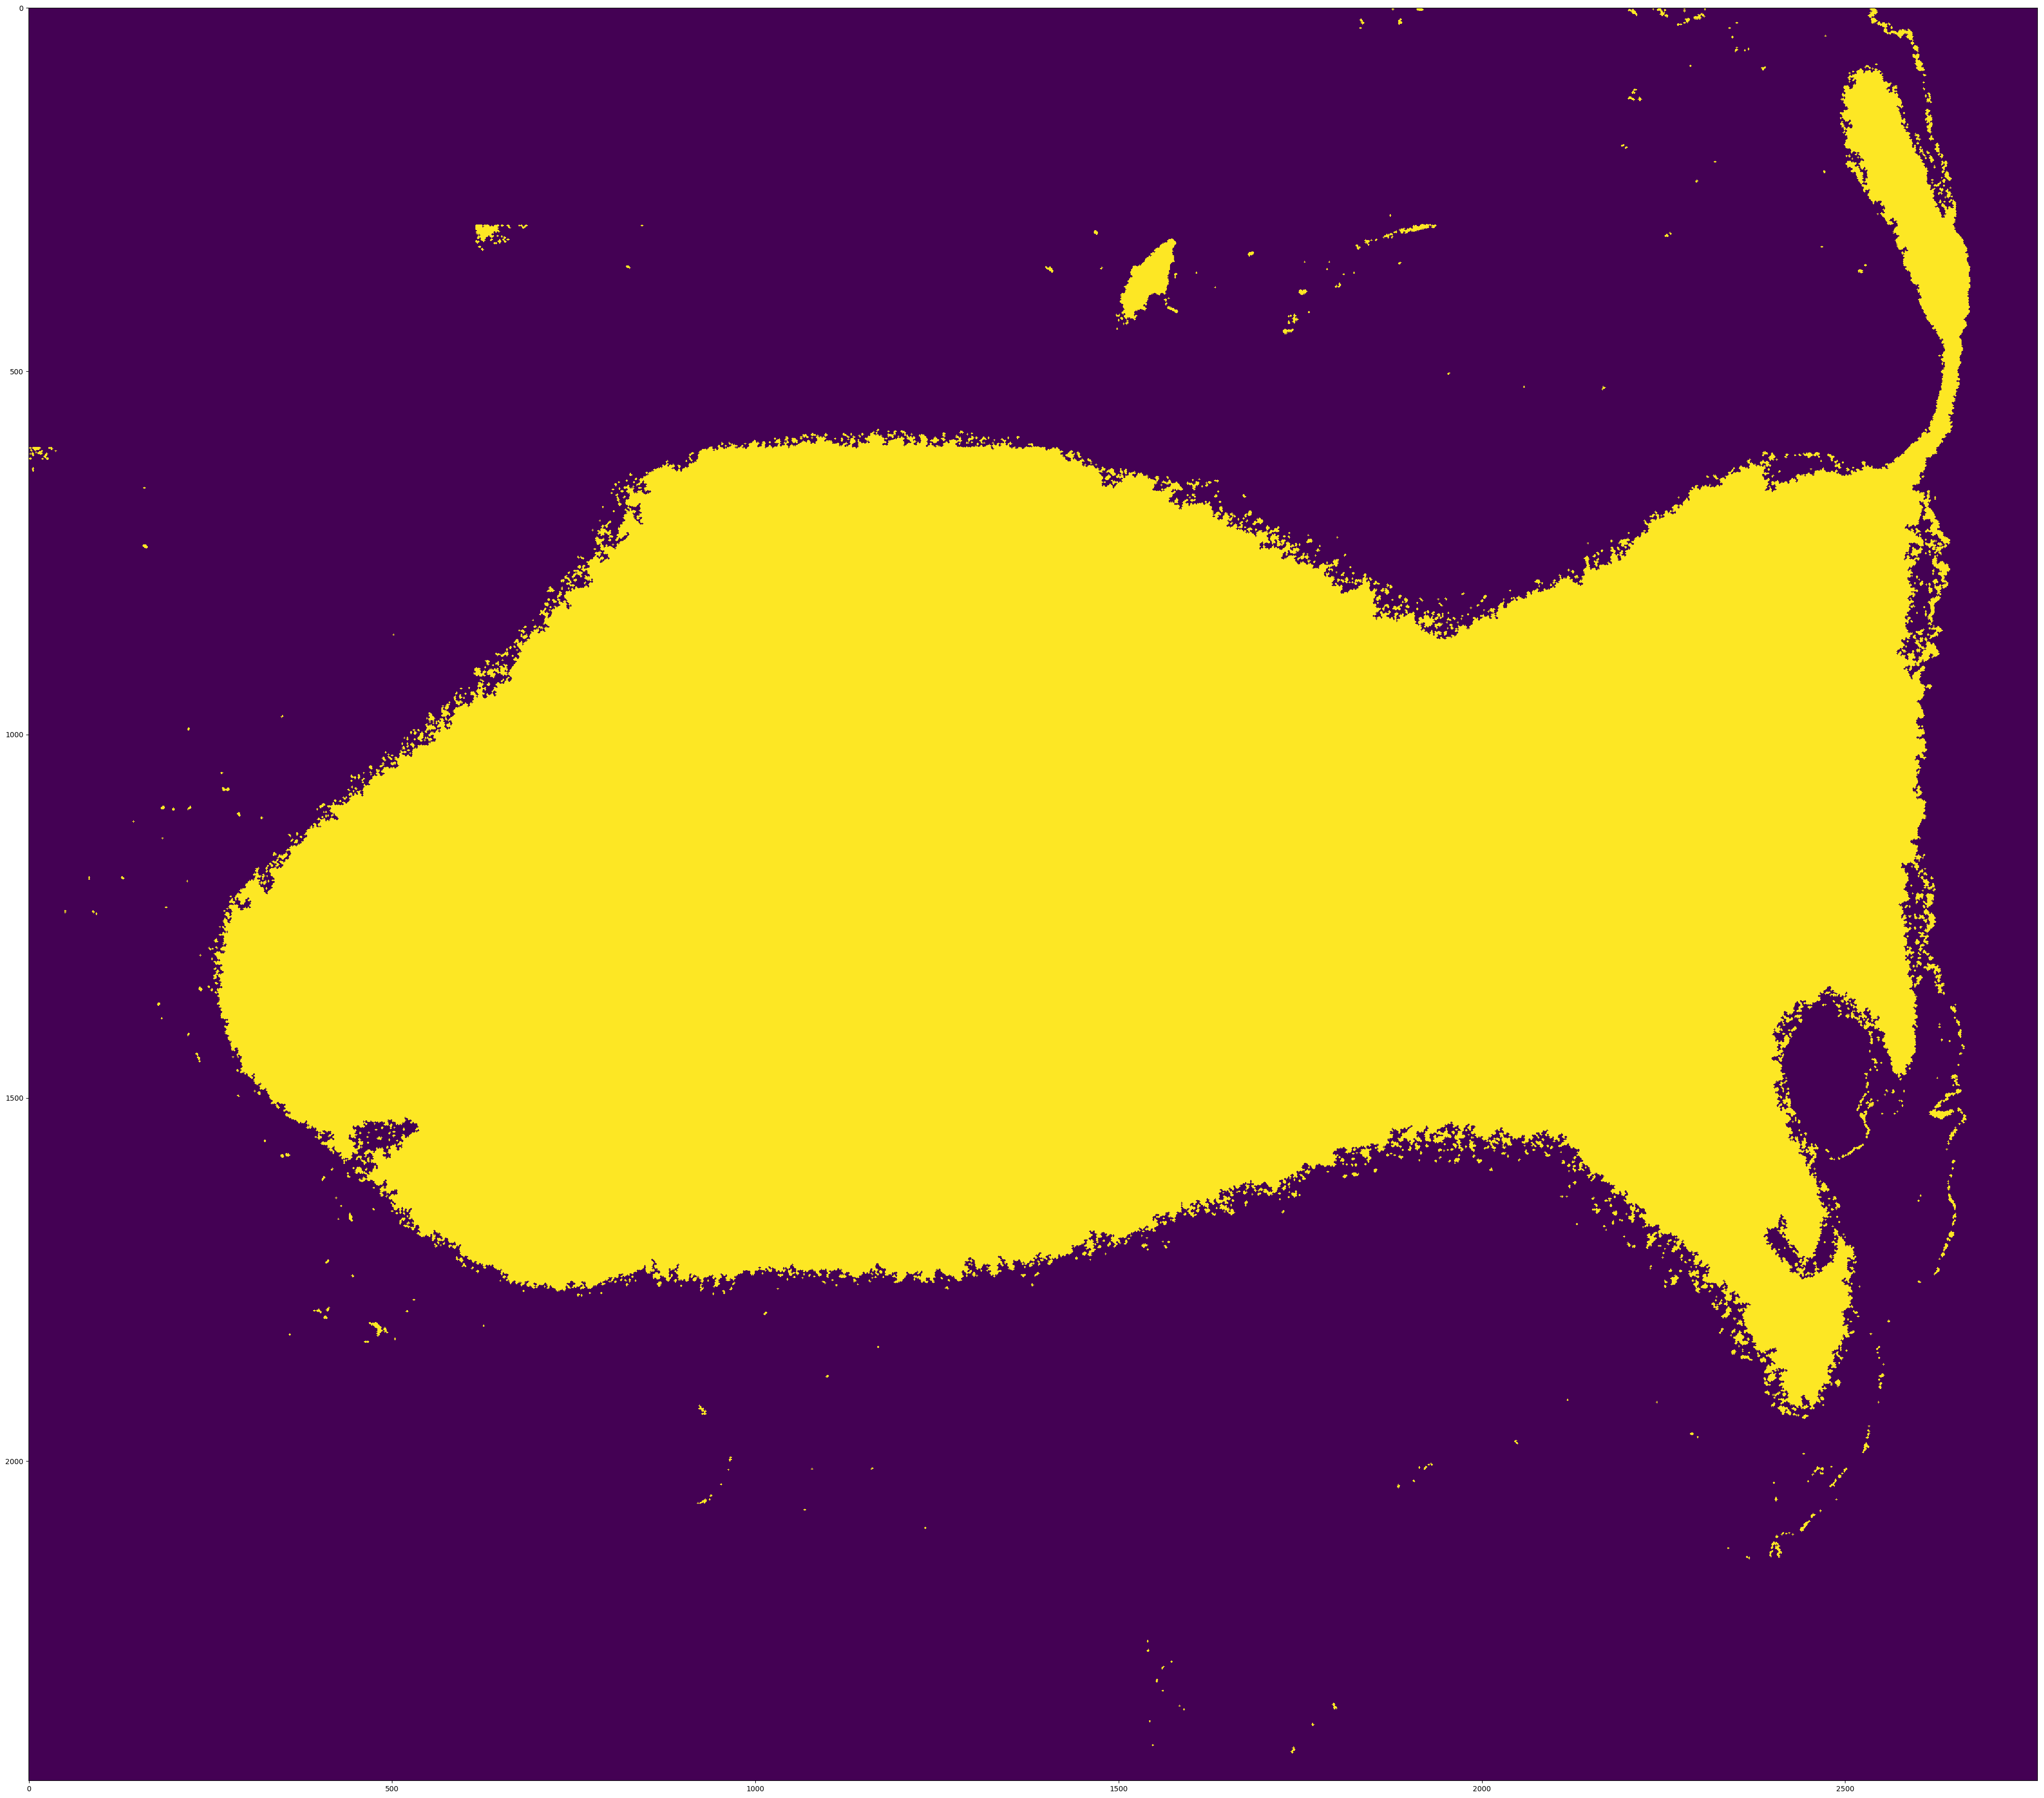

In [14]:
i = 130

img = try3[i,:,:]


plt.figure(figsize=(50,50))
plt.imshow(img)

In [14]:
# for x in range(30):
#         try4 = ndimage.binary_dilation(img)
#         try5 = ndimage.binary_closing(try4)
#         try6 = ndimage.binary_closing(try5)
#         img = ndimage.binary_erosion(try6)

In [16]:
for i in range(len(try3)):  
    img = try3[i,:,:]
    for x in range(10):
        try4 = ndimage.binary_dilation(img)
        try5 = ndimage.binary_closing(try4)
        try6 = ndimage.binary_closing(try5)
        img = ndimage.binary_erosion(try6)
        
    img = (img*255).astype('uint8') # ? binary 
    img = Image.fromarray(img)
    
    
    img.save('thymus_2/newtest_c/'+str(i)+".tif")

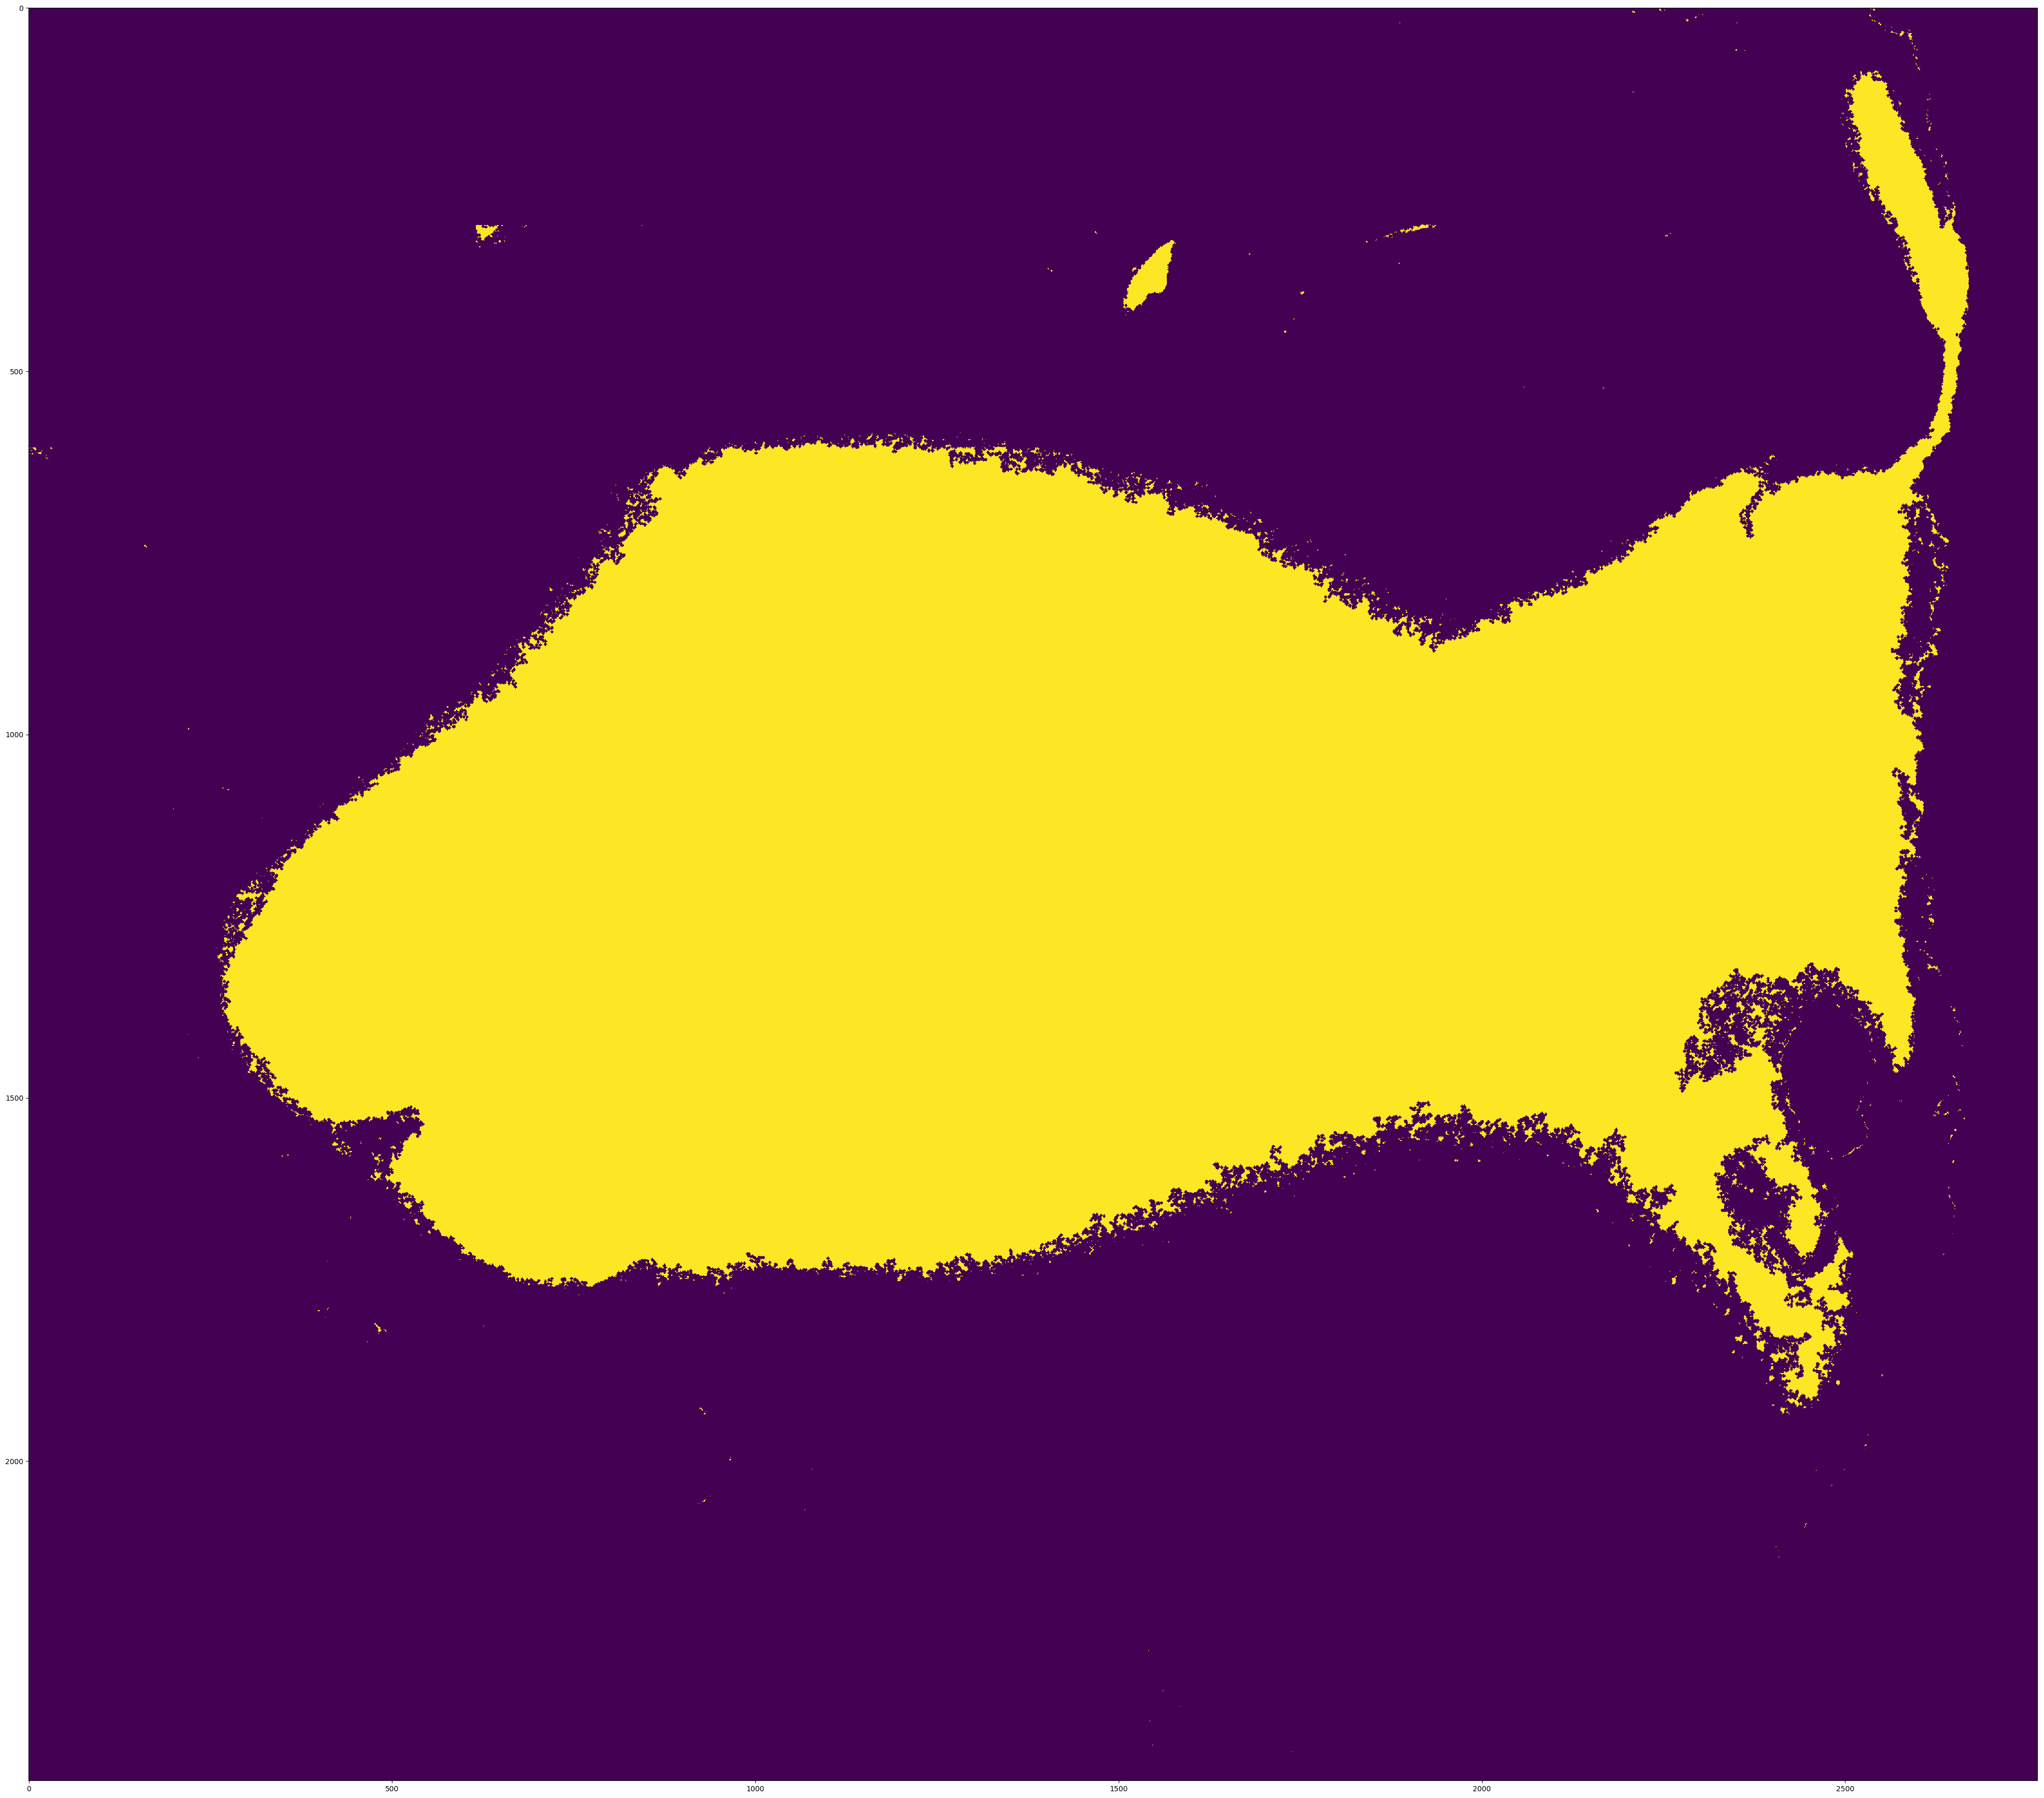

In [15]:
plt.figure(figsize=(50,50))
plt.imshow(img)

In [2]:
og_img = io.imread("/Users/spencerlab/Downloads/thymus_2/newtest_b.tif") # stack that needs to be cleaned up

In [20]:
# j = 130

In [21]:
# img_slice = og_img[j,:,:]

In [26]:
# objects, num = ndi.measurements.label(img_slice)

In [34]:
# (unique, counts) = np.unique(objects, return_counts=True)
# frequencies = np.asarray((unique, counts)).T

In [51]:
# abc = frequencies.tolist()

In [52]:
# abc.sort(key=lambda x:x[1],reverse=True)

In [55]:
# object_num =  abc[1][0]

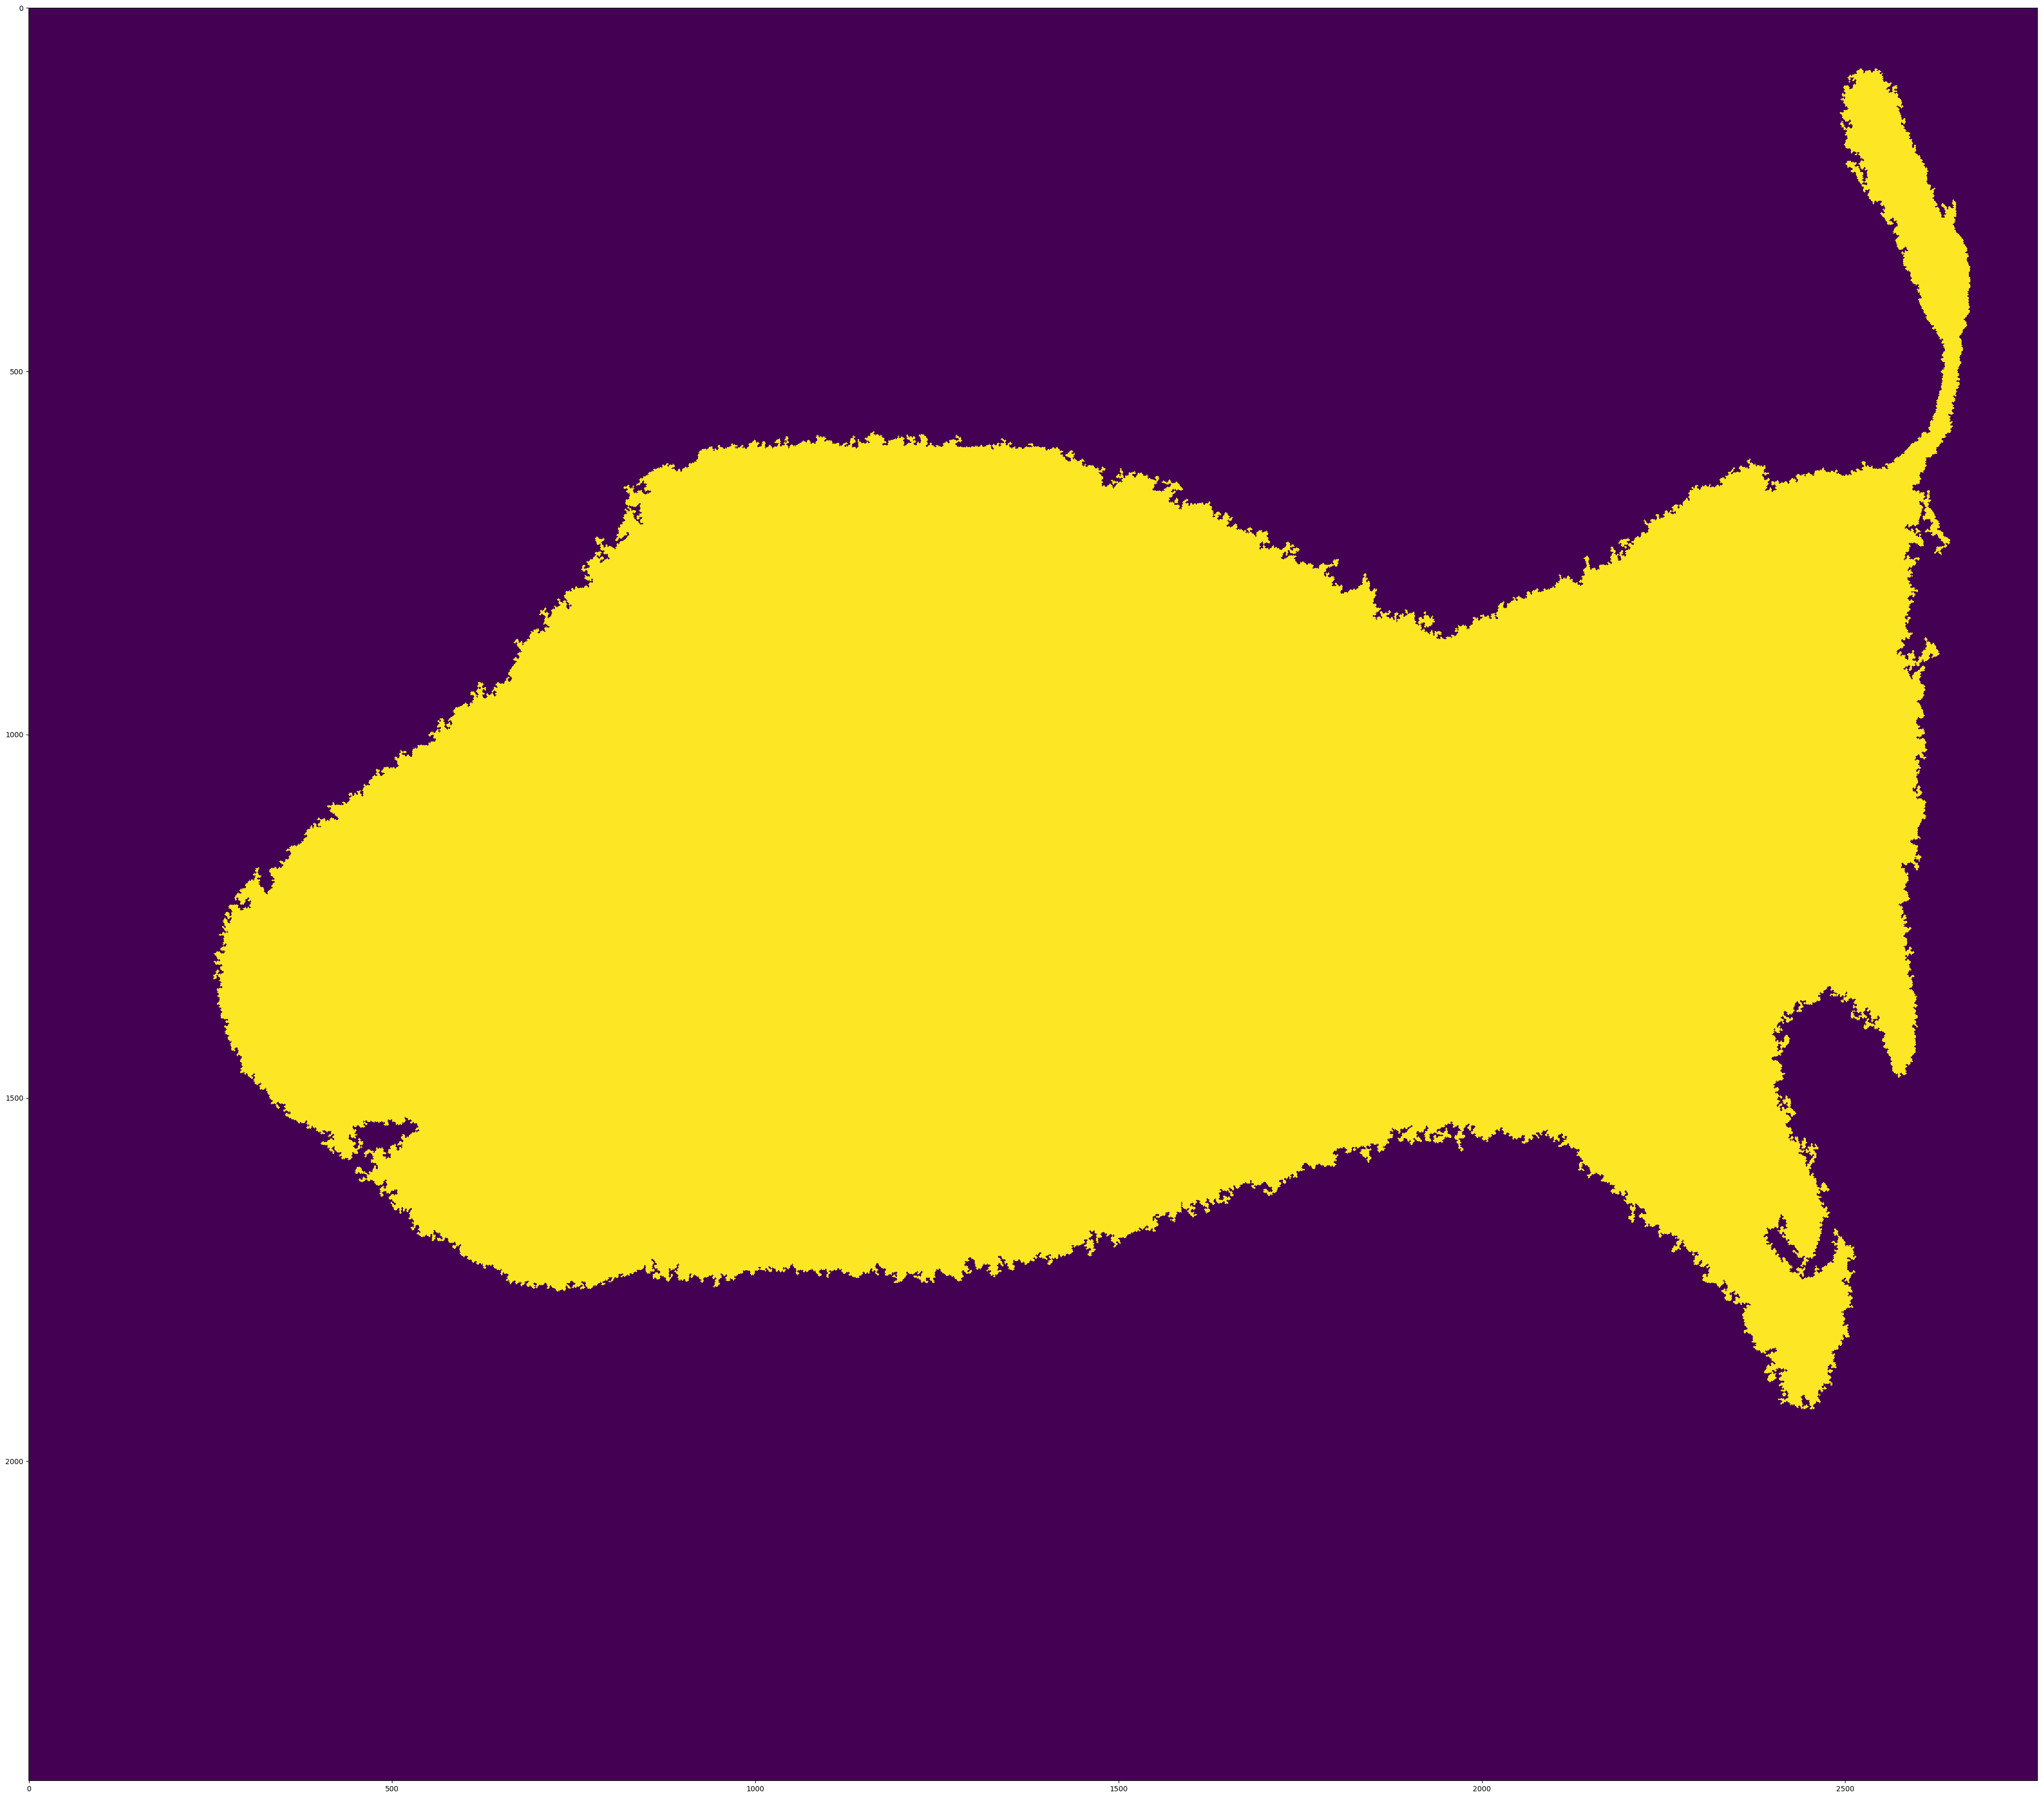

In [57]:
plt.figure(figsize=(50,50))
plt.imshow(objects == 35)

In [7]:
for x in range(len(og_img)):
    img_slice = og_img[x,:,:]
    objects, num = ndi.measurements.label(img_slice)
    
    
    # creates list of label numbers and their occurances as a tuple
    (unique, counts) = np.unique(objects, return_index = False, return_inverse = False, return_counts=True)
    frequencies = np.asarray((unique, counts)).T
    
    
    # sorts 2d list, by number of occurances, and assigns object_num to second most occuring label (bg is first)
    abc = frequencies.tolist()
    abc.sort(key=lambda x:x[1],reverse=True)

    object1 = objects == abc[1][0]
    object2 = objects == abc[2][0]
    object3 = objects == abc[3][0]
    
    
    if ((x >= 35) and (x <= 148)):
        final_pic = object1
    else:
        final_pic = np.logical_or(object1, object2)

    final_pic = (final_pic*255).astype('uint8')  
    final_pic = Image.fromarray(final_pic)
    
    
    final_pic.save('thymus_2/newtest_20/'+str(x)+".tif")

In [ ]:
def getNeighbors(arr):
    
    
    
    arr2 = (arr.copy())*0
    
    
    #IN YZ PLANE
    
    #bottom front
    arr2[:-1,:-1] += arr[1:,1:]
    #bottom 
    arr2[:-1] += arr[1:]
    #bottom back
    arr2[:-1, 1:] += arr[1:, :-1]
    
    #top front
    arr2[1:, :-1] += arr[:-1, 1:]
    #top
    arr2[1:] += arr[:-1]
    #top back
    arr2[1:, 1:] += arr[:-1, :-1]
    
    #front
    arr2[:, :-1] += arr[:, 1:]
    #back
    arr2[:, 1:] += arr[:, :-1]
    
    
    
    #LEFT LEFT LEFT LEFT LEFT LEFT LEFT 
    #LEFT LEFT LEFT LEFT LEFT LEFT LEFT
    #LEFT LEFT LEFT LEFT LEFT LEFT LEFT
    
    #bottom front
    arr2[:-1,:-1, 1:] += arr[1:,1:, :-1]
    #bottom 
    arr2[:-1, :, 1:] += arr[1:, :, :-1]
    #bottom back
    arr2[:-1, 1:, 1:] += arr[1:, :-1, :-1]
    
    #top front
    arr2[1:, :-1, 1:] += arr[:-1, 1:, :-1]
    #top
    arr2[1:, :, 1:] += arr[:-1, :, :-1]
    #top back
    arr2[1:, 1:, 1:] += arr[:-1, :-1, :-1]
    
    #front
    arr2[:, :-1, 1:] += arr[:, 1:, :-1]
    #back
    arr2[:, 1:, 1:] += arr[:, :-1, :-1]
    
    #just left 
    arr2[:, :, 1:] += arr[:, :, :-1]
    
    
    
    #RIGHT RIGHT RIGHT RIGHT RIGHT RIGHT
    #RIGHT RIGHT RIGHT RIGHT RIGHT RIGHT
    #RIGHT RIGHT RIGHT RIGHT RIGHT RIGHT
    
    #bottom front
    arr2[:-1,:-1, :-1] += arr[1:,1:, 1:]
    #bottom 
    arr2[:-1, :, :-1] += arr[1:, :, 1:]
    #bottom back
    arr2[:-1, 1:, :-1] += arr[1:, :-1, 1:]
    
    #top front
    arr2[1:, :-1, :-1] += arr[:-1, 1:, 1:]
    #top
    arr2[1:, :, :-1] += arr[:-1, :, 1:]
    #top back
    arr2[1:, 1:, :-1] += arr[:-1, :-1, 1:]
    
    #front
    arr2[:, :-1, :-1] += arr[:, 1:, 1:]
    #back
    arr2[:, 1:, :-1] += arr[:, :-1, 1:]
    
    
    #just right 
    arr2[:, :, :-1] += arr[:, :, 1:]
    
    
    
    return arr2*(arr!=0)

In [ ]:
#skel
#segs
#nodes
segs =io.imread("/Users/spencerlab/Downloads/skel_Segs.tif")
nodes =io.imread("/Users/spencerlab/Downloads/skel_Nodes.tif")
# node_labels = m.label(nodes)
# segs_labels = m.label(segs)

# endpoints = getNeighor(segs!=0) == 1

#endpoint_w_nodeVal = Node_Seg_matching(node_labels, endpoints)
#np.where(endpoints!=0) 
